In [1]:
!pip install geopandas shapely pyproj

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
cong_path = '/content/drive/MyDrive/MSSP607/e.Data/california-congressional-districts.geojson'
pop_path  = '/content/drive/MyDrive/MSSP607/e.Data/CA_Legislative_Districts.csv'
gdf_cong = gpd.read_file(cong_path)
print("Congressional districts CRS:", gdf_cong.crs)
print("Columns in congressional districts layer:", gdf_cong.columns)
gdf_cong.head()

Congressional districts CRS: EPSG:4326
Columns in congressional districts layer: Index(['Name', 'description', 'descriptio', 'geometry'], dtype='object')


,Name,description,descriptio,geometry
0,01,None,,"MULTIPOLYGON (((-120.07192 41.99495, -120.0010..."
1,02,None,,"MULTIPOLYGON (((-123.69821 41.81719, -123.6967..."
2,03,None,,"MULTIPOLYGON (((-121.667 39.30511, -121.63015 ..."
3,04,None,,"MULTIPOLYGON (((-120.37731 37.61679, -120.3823..."
4,05,None,,"MULTIPOLYGON (((-122.16384 38.64288, -122.1659..."


<Figure size 800x1000 with 0 Axes>

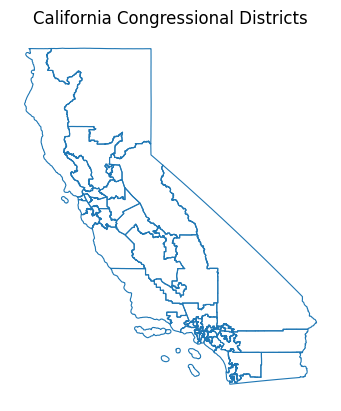

In [7]:
plt.figure(figsize=(8, 10))
gdf_cong.boundary.plot(linewidth=0.8)
plt.title("California Congressional Districts")
plt.axis('off')
plt.show()

In [8]:
df_pop = pd.read_csv(pop_path)
print("Columns in population CSV:", df_pop.columns)
df_pop.head()

Columns in population CSV: Index(['OBJECTID', 'ID', 'AREA', 'DISTRICT', 'MEMBERS', 'NAME', 'POPULATION',
       'CVAP_19', 'HSP_CVAP_1', 'DOJ_NH_BLK', 'DOJ_NH_ASN', 'NH_WHT_CVA',
       'IDEAL_VALU', 'DEVIATION', 'F_DEVIATIO', 'MULTIPLE_F', 'F_CVAP_19',
       'F_HSP_CVAP', 'F_DOJ_NH_B', 'F_DOJ_NH_A', 'F_NH_WHT_C', 'DISTRICT_L',
       'DISTRICT_N', 'SHAPE_Length', 'SHAPE_Area'],
      dtype='object')


,OBJECTID,ID,AREA,DISTRICT,MEMBERS,NAME,POPULATION,CVAP_19,HSP_CVAP_1,DOJ_NH_BLK,...,MULTIPLE_F,F_CVAP_19,F_HSP_CVAP,F_DOJ_NH_B,F_DOJ_NH_A,F_NH_WHT_C,DISTRICT_L,DISTRICT_N,SHAPE_Length,SHAPE_Area
0,1,1,27014.63,1,1,MTCAP,760066,549203,77031,10923,...,1|0,0.7226,0.1403,0.0199,0.0475,0.7507,1|0%,1,2.633906e+06,1.222952e+11
1,2,2,560.65,10,1,STANI,760066,503249,67160,26317,...,10|0,0.6621,0.1335,0.0523,0.1713,0.6220,10|0%,10,3.582890e+05,2.336909e+09
2,3,3,226.43,11,1,COCO,760067,568460,61171,33907,...,11|1,0.7479,0.1076,0.0596,0.3160,0.5006,11|0%,11,2.111932e+05,9.404054e+08
3,4,4,141.25,12,1,SF,760065,510978,74038,101894,...,12|-1,0.6723,0.1449,0.1994,0.2139,0.4169,12|-0%,12,1.246786e+05,5.869476e+08
4,5,5,6346.92,13,1,OKLND,760065,393416,197645,16042,...,13|-1,0.5176,0.5024,0.0408,0.0621,0.3708,13|-0%,13,1.186868e+06,2.578115e+10


In [9]:
print(gdf_cong['Name'].head(10))

0    01
1    02
2    03
3    04
4    05
5    06
6    07
7    08
8    09
9    10
Name: Name, dtype: object


In [10]:
gdf_cong['DISTRICT'] = gdf_cong['Name'].astype('int64')
print(gdf_cong[['Name', 'DISTRICT']].head(10))

  Name  DISTRICT
0   01         1
1   02         2
2   03         3
3   04         4
4   05         5
5   06         6
6   07         7
7   08         8
8   09         9
9   10        10


In [11]:
gdf_merged = gdf_cong.merge(
    df_pop[['DISTRICT', 'POPULATION']],
    on='DISTRICT',
    how='left'
)

print("Merged columns:")
print(gdf_merged.columns)
gdf_merged.head()

Merged columns:
Index(['Name', 'description', 'descriptio', 'geometry', 'DISTRICT',
       'POPULATION'],
      dtype='object')


,Name,description,descriptio,geometry,DISTRICT,POPULATION
0,01,None,,"MULTIPOLYGON (((-120.07192 41.99495, -120.0010...",1,760066.0
1,02,None,,"MULTIPOLYGON (((-123.69821 41.81719, -123.6967...",2,760067.0
2,03,None,,"MULTIPOLYGON (((-121.667 39.30511, -121.63015 ...",3,760065.0
3,04,None,,"MULTIPOLYGON (((-120.37731 37.61679, -120.3823...",4,760065.0
4,05,None,,"MULTIPOLYGON (((-122.16384 38.64288, -122.1659...",5,760065.0


<Figure size 800x1000 with 0 Axes>

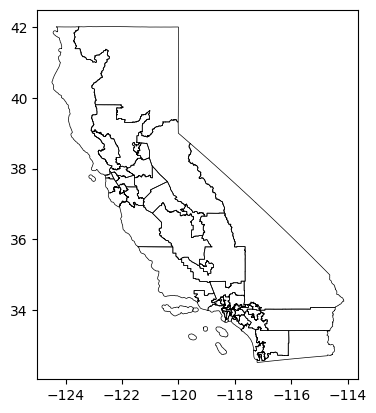

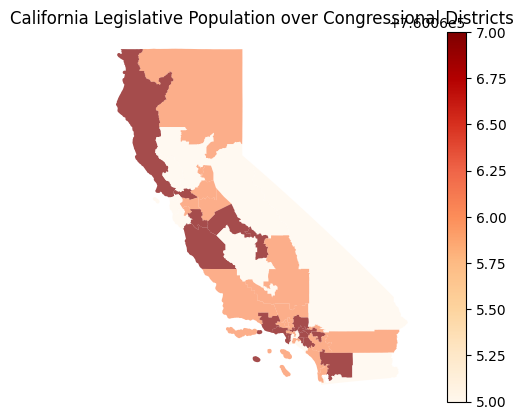

In [12]:
plt.figure(figsize=(8, 10))

gdf_cong.boundary.plot(linewidth=0.5, color='black')

gdf_merged.plot(
    column='POPULATION',
    cmap='OrRd',
    alpha=0.7,
    legend=True
)

plt.title("California Legislative Population over Congressional Districts")
plt.axis('off')
plt.show()

<Figure size 800x1000 with 0 Axes>

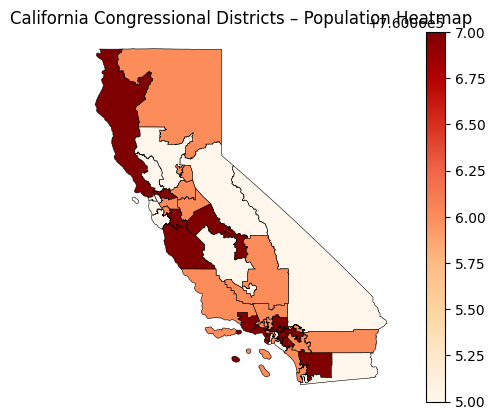

In [13]:
plt.figure(figsize=(8, 10))

gdf_merged.plot(
    column='POPULATION',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.4
)

plt.title("California Congressional Districts – Population Heatmap")
plt.axis('off')
plt.show()